<a href="https://colab.research.google.com/github/CMPE252/customer-churn-prediction/blob/main/CMPE_252_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE 252: Customer Churn Prediction

- **Date:** January 22, 2026

- **Data:** [Customer Churn](https://www.kaggle.com/datasets/undersc0re/predict-the-churn-risk-rate)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


# Step 1: Data Cleaning & Pre-processing

## 1.1 Import Data

In [ ]:
# Import the dataset

#------- THIS PART WILL BE DELETED BEFORE SUBMISSION -------
#IF YOU ARE WORKING WITH COPY OF THE FILE WRITE YOUR PATH BELOW
from google.colab import drive
drive.mount('/content/drive')
#path = "/content/drive/MyDrive/Colab/2_ISE 201/Data/Project/"   #Annie
path = "/content/drive/MyDrive/churn.csv"     #Cahide

# Load data
df = pd.read_csv(path, encoding='latin1')
#------- THIS PART WILL BE DELETED BEFORE SUBMISSION ------



#------- THIS LINE SHOULD BE USED IN GITHUB MAKE SURE IT IS WORKING------
#Load data
#df = pd.read_csv("data/churn.csv", encoding='latin1')
#------- THIS LINE SHOULD BE USED IN GITHUB MAKE SURE IT IS WORKING------
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,2,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,4,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,1


## 1.2 Data Dimensions & Types

In [ ]:
# Check data size
df.shape

(36992, 24)

There are 36992 rows and 24 columns in the churn dataset.

In [ ]:
# Check columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    36992 non-null  int64  
 1   age                           36992 non-null  int64  
 2   gender                        36992 non-null  object 
 3   security_no                   36992 non-null  object 
 4   region_category               31564 non-null  object 
 5   membership_category           36992 non-null  object 
 6   joining_date                  36992 non-null  object 
 7   joined_through_referral       36992 non-null  object 
 8   referral_id                   36992 non-null  object 
 9   preferred_offer_types         36704 non-null  object 
 10  medium_of_operation           36992 non-null  object 
 11  internet_option               36992 non-null  object 
 12  last_visit_time               36992 non-null  object 
 13  d

There are 7 numeric features and 17 categorical features in the dataset. The customer ID column (#0) is unnamed. Also, the counts of records are different for some features.

## 1.2 Target Variable (Class Imbalance)

In [ ]:
target = 'churn_risk_score'

The target variable of the dataset is 'churn_risk_score'. This column will be used as 'target' in this project.

In [ ]:
df[target].value_counts()

,count
churn_risk_score,
1,20012
0,16980


In [ ]:
imbalance = df[target].value_counts(normalize=True)
print(imbalance*100)

churn_risk_score
1    54.098183
0    45.901817
Name: proportion, dtype: float64


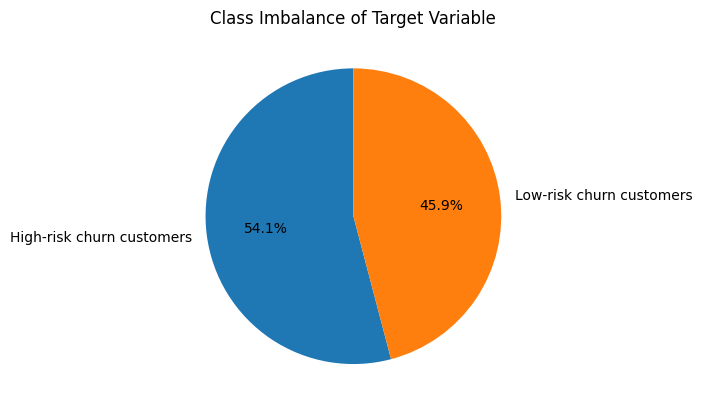

In [ ]:
churn_label = ['High-risk churn customers','Low-risk churn customers']
plt.figure()
plt.pie(
    imbalance,
    labels = churn_label,
    startangle = 90,
    autopct='%1.1f%%'
)
plt.title('Class Imbalance of Target Variable')
plt.show()

There is a slight class imbalance with 54% high-risk churn customers and 46% low-risk churn customers for the target variable.

## 1.4 Duplicates

In [ ]:
df.duplicated().sum()

np.int64(0)

There is no duplicate data in the dataset.

## 1.5 Train-Validation-Test Split

In [ ]:
X_features = df.drop(columns = [target]) # All features except target variable
y_churn = df[target] #Target vector

#First step: The data is splitted as train (70%) and temp (30%) because the train_test_split method supports binary splits.

X_train, X_temp, y_train, y_temp = train_test_split(
    X_features, y_churn,
    test_size = 0.30, # 30% test part (temp for first split)
    stratify=y_churn, # Used for preserving the class distribution of the target variable
    random_state = 42

)

#X_train, y_train -> 70% training portion
#X_temp,y_temp -> 30% test+val portion, not splitted to test and validation yet.

# Second step: The temp portions are splitted as validation 15% and test 15%
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp,
    test_size = 0.50, # The temp is splitted 2 equal portions (30% * 0.5 = 15%)
    stratify=y_temp, # Used for preserving the class distribution of the target variable again for test and validation portions
    random_state = 42
)

#X_valid, y_valid -> 15% validation portion
#X_test, y_test -> 15% test portion

The dataset was split into training, validation, and test sets before any preprocessing, EDA and feature engineering steps to prevent data leakage into the validation and test sets. All subsequent steps will be performed on the training set and then applied to the validation and test sets.   
X_train, y_train --> training set  
X_valid, y_valid --> validation set  
X_test, y_test --> test set

churn_risk_score
1    54.097474
0    45.902526
Name: proportion, dtype: float64
churn_risk_score
1    54.099838
0    45.900162
Name: proportion, dtype: float64
churn_risk_score
1    54.099838
0    45.900162
Name: proportion, dtype: float64


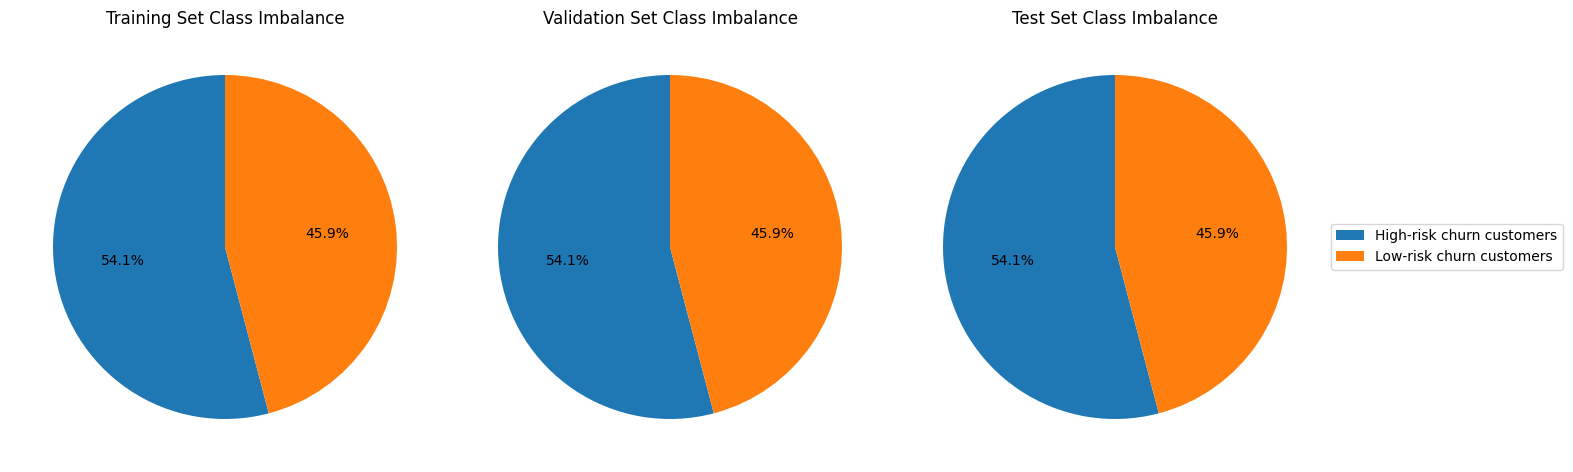

In [ ]:
imbalance_train = y_train.value_counts(normalize=True)
imbalance_valid= y_valid.value_counts(normalize=True)
imbalance_test = y_test.value_counts(normalize=True)
print(imbalance_train *100)
print(imbalance_valid *100)
print(imbalance_test *100)

fig, axes = plt.subplots(1, 3, figsize=(15,5))

imbalance_train.plot(
    kind='pie', autopct='%1.1f%%', ax=axes[0],
    title='Training Set Class Imbalance', ylabel='', labels=None,
    startangle = 90)

imbalance_valid.plot(
    kind='pie', autopct='%1.1f%%', ax=axes[1],
    title='Validation Set Class Imbalance', ylabel='',labels=None,
    startangle = 90)

imbalance_test.plot(
    kind='pie', autopct='%1.1f%%', ax=axes[2],
    title='Test Set Class Imbalance', ylabel='',labels=None,
    startangle = 90)
fig.legend(
    churn_label,
    loc = 'center right',
    bbox_to_anchor=(1.05, 0.5)
)
plt.tight_layout(rect = [0,0,0.9,1])
plt.show()

After examining the class distributions of the churn subsets, y_train, y_valid, and y_test, it was observed that the class imbalance is consistent across all subsets, indicating that the stratified splitting strategy was successfully applied.

## 1.6 Dropping Identification Features

In [ ]:
# Column names to dropping
columns_to_drop = ["Unnamed: 0", "security_no"]

#Drop them from all subsets

X_train = X_train.drop(columns=columns_to_drop)
X_valid = X_valid.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)


In [ ]:
print(X_train.info())
print(X_valid.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 25894 entries, 36181 to 134
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           25894 non-null  int64  
 1   gender                        25894 non-null  object 
 2   region_category               22101 non-null  object 
 3   membership_category           25894 non-null  object 
 4   joining_date                  25894 non-null  object 
 5   joined_through_referral       25894 non-null  object 
 6   referral_id                   25894 non-null  object 
 7   preferred_offer_types         25691 non-null  object 
 8   medium_of_operation           25894 non-null  object 
 9   internet_option               25894 non-null  object 
 10  last_visit_time               25894 non-null  object 
 11  days_since_last_login         25894 non-null  int64  
 12  avg_time_spent                25894 non-null  float64
 13  avg_

As stated in the project proposal, identification features were removed from the dataset since they are not intended to be used in the prediction process. However, contrary to the initial plan outlined in the proposal, the joining_date column was retained because it is expected to be useful for deriving new features that may contribute to the modeling process.

## 1.7 Missing value

In [ ]:
X_train.isnull().sum()

,0
age,0
gender,0
region_category,3793
membership_category,0
joining_date,0
joined_through_referral,0
referral_id,0
preferred_offer_types,203
medium_of_operation,0
internet_option,0


The features region_category preferred_offer_types and points_in_wallet have null values as shown above. Also, the categorical values that are not meaningful should be checked.

In [ ]:
# Checks every categorical columns value counts
for col in X_train.select_dtypes(include="object").columns:
    print(X_train[col].value_counts())
    print("_" * 40)


gender
M          12957
F          12892
Unknown       45
Name: count, dtype: int64
________________________________________
region_category
Town       9906
City       8870
Village    3325
Name: count, dtype: int64
________________________________________
membership_category
No Membership          5419
Basic Membership       5339
Gold Membership        4752
Silver Membership      4215
Premium Membership     3139
Platinum Membership    3030
Name: count, dtype: int64
________________________________________
joining_date
2015-06-02    41
2015-03-30    37
2016-08-03    37
2017-03-19    37
2017-10-28    37
              ..
2016-09-16    12
2015-02-25    12
2016-06-03    12
2016-08-05     9
2015-06-07     9
Name: count, Length: 1096, dtype: int64
________________________________________
joined_through_referral
No     11148
Yes    10948
?       3798
Name: count, dtype: int64
________________________________________
referral_id
xxxxxxxx    12551
CID43705        9
CID3979         9
CID49598    

As seen above there are some non-standard values in some columns:  
gender -> 'Unknown'  
joined_through_referral -> '?'  
referral_id -> 'xxxxxxxx'  
medium_of_operation -> '?'  
avg_frequency_login_days -> 'Error'  
These values should be changed with null value NaN before making missing value imputation. Also, avg_frequency_login_days feature is categorical but except 'Error' it has float values. It should be a numeric column and it contains negative values which we should handle.

In [ ]:
# Change the data type of avg_frequency_login_days while deleting the non-standard value 'Error' in all sub sets
X_train["avg_frequency_login_days"] = pd.to_numeric(X_train["avg_frequency_login_days"], errors= "coerce")
X_valid["avg_frequency_login_days"] = pd.to_numeric(X_valid["avg_frequency_login_days"], errors= "coerce")
X_test["avg_frequency_login_days"] = pd.to_numeric(X_test["avg_frequency_login_days"], errors= "coerce")


print(X_train["avg_frequency_login_days"].dtype)
print(X_valid["avg_frequency_login_days"].dtype)
print(X_test["avg_frequency_login_days"].dtype)

float64
float64
float64


avg_frequency_login_days feature returning from object to float data type and the 'Error' value is deleted from this column.

In [ ]:
# Checks every numerical columns min 5 values
for col in X_train.select_dtypes(include=np.number).columns:
    print(X_train[col].sort_values().head(5))
    print("_" * 40)


28493    10
6079     10
24582    10
2227     10
17646    10
Name: age, dtype: int64
________________________________________
12881   -999
17671   -999
2343    -999
13373   -999
34421   -999
Name: days_since_last_login, dtype: int64
________________________________________
23206   -2814.109110
3565    -2093.121606
26833   -2034.801880
22073   -1941.035419
31043   -1918.486339
Name: avg_time_spent, dtype: float64
________________________________________
34596    800.46
36393    804.34
1335     806.22
15253    813.82
1169     815.22
Name: avg_transaction_value, dtype: float64
________________________________________
36525   -43.625413
28807   -34.417115
8861    -33.499563
31522   -28.592012
20832   -25.528875
Name: avg_frequency_login_days, dtype: float64
________________________________________
28075   -506.256716
30059   -483.856401
21800   -469.020399
12880   -445.288457
22096   -412.441688
Name: points_in_wallet, dtype: float64
________________________________________


days_since_last_login, avg_time_spent, avg_frequency_login_days and points_in_wallet features contain negative values altough such values are not logically expected.

In [ ]:
nonstandard_values = ['Unknown', '?', 'xxxxxxxx', 'Error']
nonstandard_cols = ['gender','joined_through_referral', 'referral_id','medium_of_operation']

for column in nonstandard_cols:
  #replace the invalid values with NaN
  X_train[column] = X_train[column].replace(nonstandard_values, np.nan)
  print(X_train[column].value_counts())
  print("_" * 40)



gender
M    12957
F    12892
Name: count, dtype: int64
________________________________________
joined_through_referral
No     11148
Yes    10948
Name: count, dtype: int64
________________________________________
referral_id
CID43705    9
CID3979     9
CID49598    8
CID1595     8
CID15792    7
           ..
CID60868    1
CID5533     1
CID44386    1
CID25027    1
CID48507    1
Name: count, Length: 8945, dtype: int64
________________________________________
medium_of_operation
Desktop       9787
Smartphone    9677
Both          2635
Name: count, dtype: int64
________________________________________


After replacing non-standard values with NaN, the invalid values are gone as seen above. Same steps should be applied in validation and test sets to ensure consistency in the preprocessing pipeline.

In [ ]:
for column in nonstandard_cols:
  #replace the invalid values with NaN
  X_valid[column] = X_valid[column].replace(nonstandard_values, np.nan)
  X_test[column] = X_test[column].replace(nonstandard_values, np.nan)

In [ ]:
negative_cols = ['days_since_last_login', 'avg_time_spent', 'avg_frequency_login_days', 'points_in_wallet']
for column in negative_cols:
  X_train.loc[X_train[column] < 0, column] = np.nan
  print(X_train[column].sort_values().head(5))
  print("_" * 40)

11884    1.0
21382    1.0
33473    1.0
26114    1.0
26763    1.0
Name: days_since_last_login, dtype: float64
________________________________________
6728     22.729738
14316    29.837667
10276    29.990000
24984    29.990000
24583    29.990000
Name: avg_time_spent, dtype: float64
________________________________________
8804     0.009208
16751    0.027318
25562    0.030449
4459     0.113511
16161    0.132288
Name: avg_frequency_login_days, dtype: float64
________________________________________
30319     6.432208
21125     8.116084
2440      9.837591
18343     9.926138
3385     10.213509
Name: points_in_wallet, dtype: float64
________________________________________


The negative values detected in the four previously identified columns were replaced with NaN. This transformation was first applied to the training dataset, and as shown above, it was successfully implemented. The same procedure will now be applied to the validation and test datasets.

In [ ]:
for column in negative_cols:
  X_valid.loc[X_valid[column] < 0, column] = np.nan
  X_test.loc[X_test[column] < 0, column] = np.nan

In [ ]:
X_train.isnull().sum()

,0
age,0
gender,45
region_category,3793
membership_category,0
joining_date,0
joined_through_referral,3798
referral_id,12551
preferred_offer_types,203
medium_of_operation,3795
internet_option,0


There are 10 columns containing missing values that need to be addressed. For numerical features, missing values will be imputed using the median, while for categorical features, missing values will be imputed using the mode (most frequent value).

In [ ]:
# For numerical columns, median should be used
median = SimpleImputer(strategy = "median")

# Using fit_transform because median and mode should be learned from just train data subset.
# If we calculate the median of validation and test subsets, it will be cause of data leakage
numerical_cols = ['points_in_wallet', 'avg_frequency_login_days', 'avg_time_spent', 'days_since_last_login']
X_train[numerical_cols] = median.fit_transform(X_train[numerical_cols])
X_valid[numerical_cols] = median.transform(X_valid[numerical_cols])
X_test[numerical_cols] = median.transform(X_test[numerical_cols])

mode = SimpleImputer(strategy = "most_frequent")

categorical_cols = ['gender', 'region_category', 'joined_through_referral', 'referral_id', 'preferred_offer_types','medium_of_operation']
X_train[categorical_cols] = mode.fit_transform(X_train[categorical_cols])
X_valid[categorical_cols] = mode.transform(X_valid[categorical_cols])
X_test[categorical_cols] = mode.transform(X_test[categorical_cols])

print(X_train.isnull().sum())
print(X_valid.isnull().sum())
print(X_test.isnull().sum())


age                             0
gender                          0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
dtype: int64
age                             0
gender                          0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
m

There is no more null values in all of the subsets after imputing the missing values.

## 1.8 Data Patterns

In [ ]:
# Look at statistical analysis using describe method. Default data type is numeric data with this method.
X_train.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet
count,25894.000000,25894.000000,25894.000000,25894.000000,25894.000000,25894.000000
mean,37.157836,12.784429,286.779246,29294.655362,16.451559,690.589739
std,15.877320,5.426543,325.223127,19442.687366,7.873128,178.210067
min,10.000000,1.000000,22.729738,800.460000,0.009208,6.432208
25%,23.000000,9.000000,75.252500,14238.602500,11.000000,625.550000
50%,37.000000,13.000000,173.670000,27601.660000,16.000000,698.270000
75%,51.000000,16.000000,355.792500,40906.582500,22.000000,757.130000
max,64.000000,26.000000,3040.410000,99914.050000,67.062422,2069.069761


When we look at the statistical analysis on numeric columns, the following observations can be made:  
-The avarage age of customers is 37.  
-days_since_last_login, avg_time_spent and points_in_wallet features contain negative values altough such values are not logically expected. It should be handled during outliers stage.  
-Max points in wallet is 2069.  

In [ ]:
# Filter categorical data and use desrcibe method.
X_train.describe(include='object').T

,count,unique,top,freq
gender,25894,2,M,13002
region_category,25894,3,Town,13699
membership_category,25894,6,No Membership,5419
joining_date,25894,1096,2015-06-02,41
joined_through_referral,25894,2,No,14946
referral_id,25894,8945,CID3979,12560
preferred_offer_types,25894,3,Gift Vouchers/Coupons,8834
medium_of_operation,25894,3,Desktop,13582
internet_option,25894,3,Wi-Fi,8774
last_visit_time,25894,22361,04:40:35,4


When we look at the statistical analysis on numeric columns, the following observations can be made:  
-The majority of customers don't have a membership and access the website via desktop using Wi-Fi
-Most of them are male who lives in Town.  
-The most common cause of complaints is poor product quality.  
-Customers mostly use gift vouchers/coupons as offer.

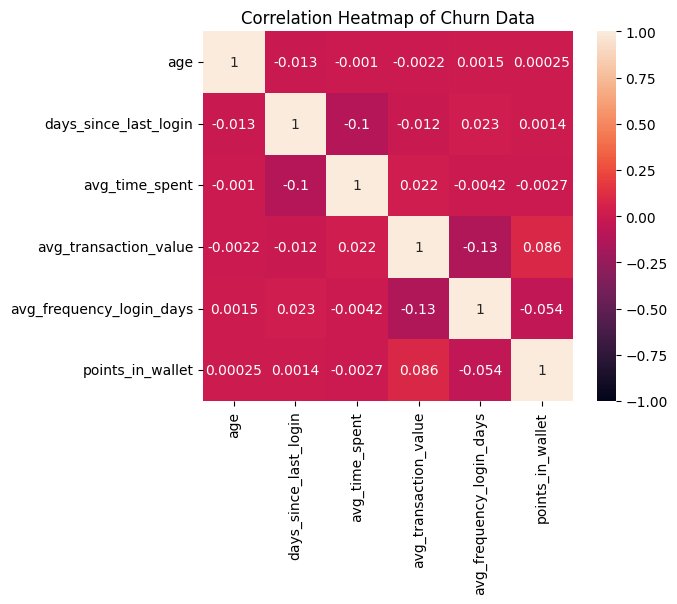

In [ ]:
correlation =X_train[X_train.select_dtypes(include=np.number).columns]
sns.heatmap(correlation.corr(), annot=True,  square = True, vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Churn Data")
plt.show()

The correlation matrix shows that there are no strong linear relationships among the numerical features. All correlation coefficients are very close to zero, with the highest observed value being approximately 0.08, which indicates a very weak association. This suggests that multicollinearity is not a concern in the dataset. Although a slight positive relationship is observed between avg_transaction_value and points_in_wallet, the strength of this correlation is negligible and does not warrant feature removal. Overall, since no meaningful linear dependencies are present among the numerical variables, no features were excluded based on correlation analysis.

In [ ]:
skewness = X_train[X_train.select_dtypes(include=np.number).columns].skew().sort_values(ascending=False)
skewness

,0
avg_time_spent,2.334274
avg_transaction_value,1.010194
avg_frequency_login_days,0.678215
points_in_wallet,0.253063
days_since_last_login,0.029005
age,-0.011420


-avg_time_spent shows strong positive skewness, which means that most customers spend a small amount of time, while a few customers spend much longer time on the platform.  
-avg_transaction_value also has positive skewness, indicating that a small number of customers have much higher transaction values than the rest.  
-avg_frequency_login_days has moderate positive skewness, showing a slightly right-skewed distribution.  
-points_in_wallet has low positive skewness, which means its distribution is close to symmetric.  
-days_since_last_login is almost symmetric, with no meaningful skewness.  
-age is also nearly symmetric, suggesting a balanced distribution.  
Overall, most numerical features have relatively balanced distributions. However, avg_time_spent and avg_transaction_value are clearly right-skewed. This means that a few large values affect the distribution. These features may need transformation later, especially for models that are sensitive to data distribution.

## 1.9 Outliers

In [ ]:
# Detect outliers in numerical features using the IQR (Interquartile Range) method.


num_cols = X_train.select_dtypes(include=np.number).columns
outlier_bounds ={}
for column in num_cols:
  q1 = X_train[column].quantile(0.25)
  q3 = X_train[column].quantile(0.75)
  iqr = q3 - q1
  # For each numerical column, lower and upper bounds are calculated
  low = q1 - 1.5 * iqr
  high = q3 + 1.5 * iqr
  outlier_bounds[column] = (low,high)

  # The number of observations falling outside these bounds is reported for the train subset.
  print(column, '-', ((X_train[column] < low) | (X_train[column] > high)).sum())


age - 0
days_since_last_login - 0
avg_time_spent - 2242
avg_transaction_value - 795
avg_frequency_login_days - 325
points_in_wallet - 3302


Outliers were detected using the Interquartile Range (IQR) method on the training dataset. For each numerical feature, lower and upper bounds were calculated based on the 1.5*IQR rule. The results indicate that age and days_since_last_login do not contain extreme values according to the IQR criterion. However, avg_time_spent, avg_transaction_value, avg_frequency_login_days, and points_in_wallet contain a considerable number of extreme observations. In particular, points_in_wallet and avg_time_spent show the highest number of outliers, suggesting the presence of heavily right-skewed distributions. These findings indicate that certain numerical features may require outlier treatment before model training.

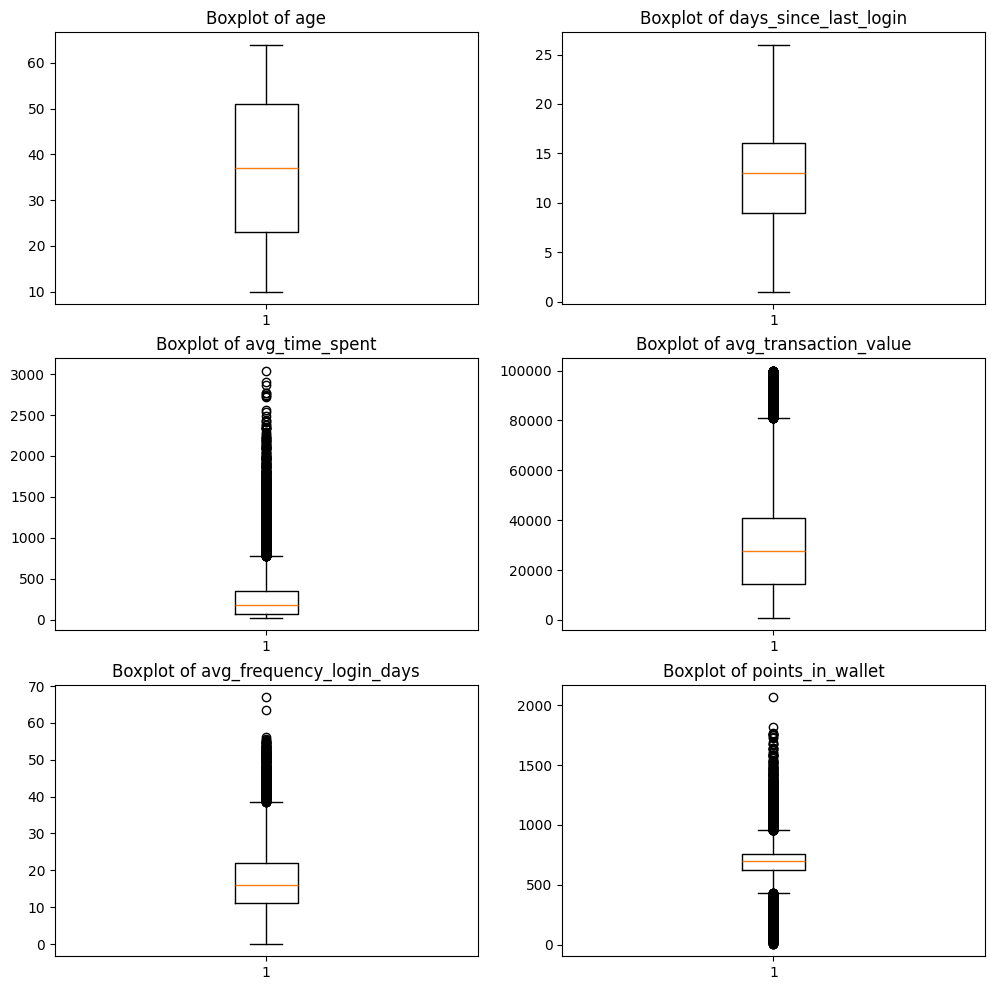

In [ ]:
# Visualize the distribution of numerical features in the training set
fig, axes = plt.subplots(3,2, figsize=(12,12))
axes = axes.flatten()

for i,column in enumerate(num_cols):

  axes[i].boxplot(X_train[column])
  axes[i].set_title("Boxplot of "+ column)

plt.show()

The boxplots illustrate the distribution of numerical features in the training dataset and provide a visual confirmation of the previously detected outliers. The features age and days_since_last_login show relatively compact distributions with no extreme observations. In contrast, avg_time_spent, avg_transaction_value, avg_frequency_login_days, and points_in_wallet display a significant number of upper outliers, which is consistent with their positively skewed distributions.

In [ ]:
cap_cols = ['avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']

# Apply IQR-based capping (winsorization) to selected numerical features.
for column in cap_cols:

  # The lower and upper bounds were learned from the training set
  low, high = outlier_bounds[column]
  X_train[column] = X_train[column].clip(lower=low, upper=high)
  # Same thresholds are applied to the validation and test sets to prevent data leakage and ensure pipeline consistency.
  X_valid[column] = X_valid[column].clip(lower=low, upper=high)
  X_test[column] = X_test[column].clip(lower=low, upper=high)

# Testing that no observations exceed the learned IQR bounds after applying the capping.
for column in cap_cols:
  low, high = outlier_bounds[column]
  print(column,'-', 'in train','-', ((X_train[column] < low) | (X_train[column] > high)).sum())
  print(column,'-', 'in validation','-', ((X_valid[column] < low) | (X_valid[column] > high)).sum())
  print(column,'-', 'in test','-', ((X_test[column] < low) | (X_test[column] > high)).sum())

avg_time_spent - in train - 0
avg_time_spent - in validation - 0
avg_time_spent - in test - 0
avg_transaction_value - in train - 0
avg_transaction_value - in validation - 0
avg_transaction_value - in test - 0
avg_frequency_login_days - in train - 0
avg_frequency_login_days - in validation - 0
avg_frequency_login_days - in test - 0
points_in_wallet - in train - 0
points_in_wallet - in validation - 0
points_in_wallet - in test - 0


After applying IQR-based capping to the selected numerical features, no observations remain outside the defined lower and upper bounds in the training, validation, or test sets. This confirms that the outlier treatment was successfully implemented. The use of training-derived thresholds ensures that the preprocessing pipeline remains consistent and free from data leakage across all subsets.

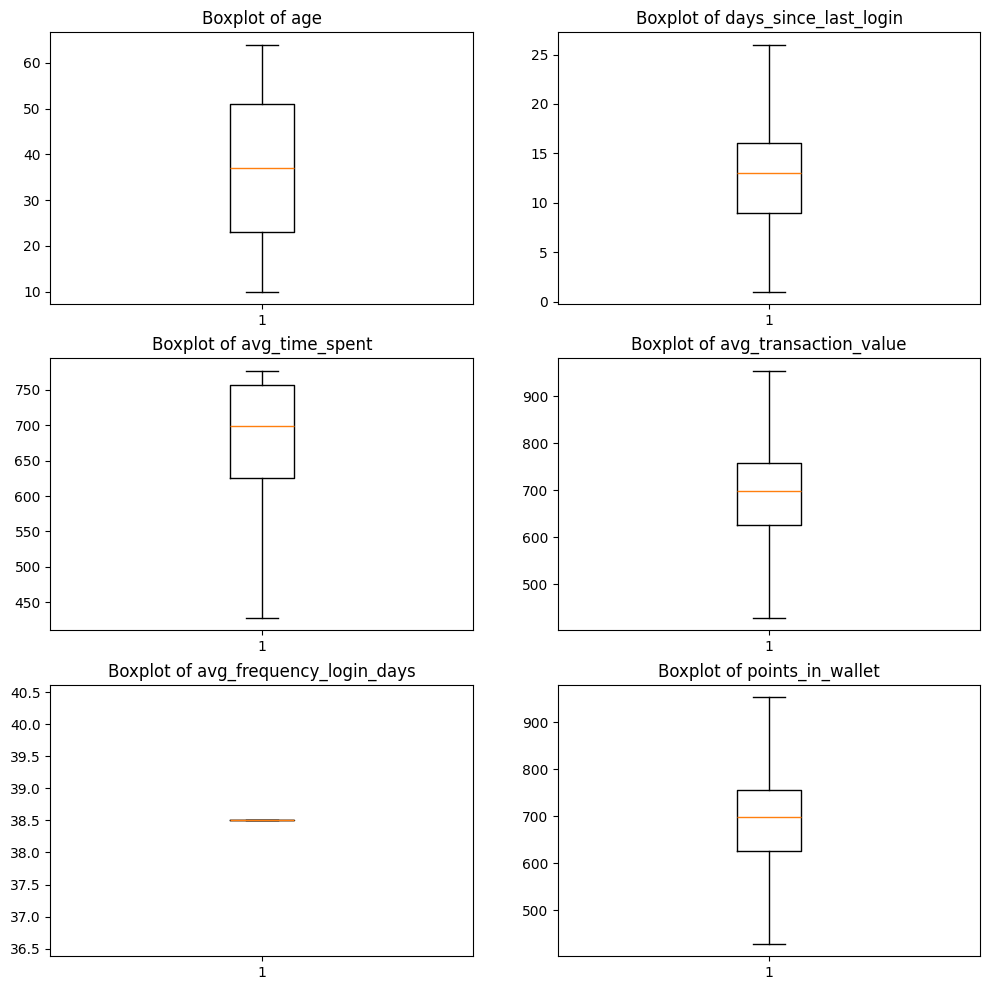

In [ ]:
# Visualize the distribution of numerical features in the training set
fig, axes = plt.subplots(3,2, figsize=(12,12))
axes = axes.flatten()

for i,column in enumerate(num_cols):

  axes[i].boxplot(X_train[column])
  axes[i].set_title("Boxplot of "+ column)

plt.show()

The boxplots after capping show that extreme values have been successfully limited within the IQR-based thresholds. The distributions appear more compact and stable compared to the previous visualization.

## 1.10 Feature Transformation

### 1.10.1 Categorical Encoding

### 1.10.2 Numerical Scaling

#Step 2: EDA

## 2.1 Target churn distribution

## 2.2 Descriptive Statistics

## 2.3 Data Distribution

## 2.4 Churn vs. Non-churn Comparison

## 2.5 Correlation Matrix

#Step 3: Feature Engineering

# Step 4: Feature Selection

## 4.1 Feature Reduction

## 4.2 Feature Importance (Using Random Forest)

#Step 5: Model Training

## 5.1 Logistic Regression

## 5.2 Naive Bayes

## 5.3 K nearest neighbors (kNN)

## 5.4 Random Forest

## 5.5 AdaBoost

## 5.6 XGBoost

#Step 6: Model Evaluation